In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [1]:
RESULTS_DIR='/home/shiv/Documents/DataScience/DrCADx/Two-Step-Feature-Enhancement/'
exp_resnet = 'experiment2022-08-22-16-31-12.csv'
exp_incep = 'experiment2022-08-22-17-21-06.csv'
exp_comb = 'experiment2022-08-22-18-40-25.csv'

In [3]:
def get_results_df(exp_name):
    df = pd.read_csv(RESULTS_DIR + exp_name)
    df = df[["valAcc","testAcc",
             "valPrec Macro", "testPrec Macro",
             "valRec Macro", "testRec Macro",
             "valF1 Macro", "testF1 Macro",
             ]]
    df = df.iloc[-1]
    df = df.T
    df = pd.DataFrame(df.values, columns=['value'], index=df.index)
    return df

In [4]:
df_resnet = get_results_df(exp_resnet)
df_incep = get_results_df(exp_incep)
df_both = get_results_df(exp_comb)

In [5]:
def get_type(row):
    str_idx = str(row.name)
    # print(str_idx)    
    if 'Acc' in str_idx:
        row['met_type']='accuracy'
    elif 'Prec Micro' in str_idx:
        row['met_type']='precision micro'
    elif 'Prec Macro' in str_idx:
        row['met_type']='precision macro'
    elif 'Rec Micro' in str_idx:
        row['met_type']='recall micro'
    elif 'Rec Macro' in str_idx:
        row['met_type']='recall macro'
    elif 'F1 Micro' in str_idx:
        row['met_type']='F1 micro'
    elif 'F1 Macro' in str_idx:
        row['met_type']='F1 macro'
    else:
        print(str_idx)
        assert(0)
    if str_idx.startswith('train'):
        row['split_type']='train'
    elif str_idx.startswith('val'):
        row['split_type']='validation'
    elif str_idx.startswith('test'):
        row['split_type']='test'
    else:
        assert(0)
    return row
        
df_resnet = df_resnet.apply(get_type, axis=1)
df_incep = df_incep.apply(get_type, axis=1)
df_both = df_both.apply(get_type, axis=1)

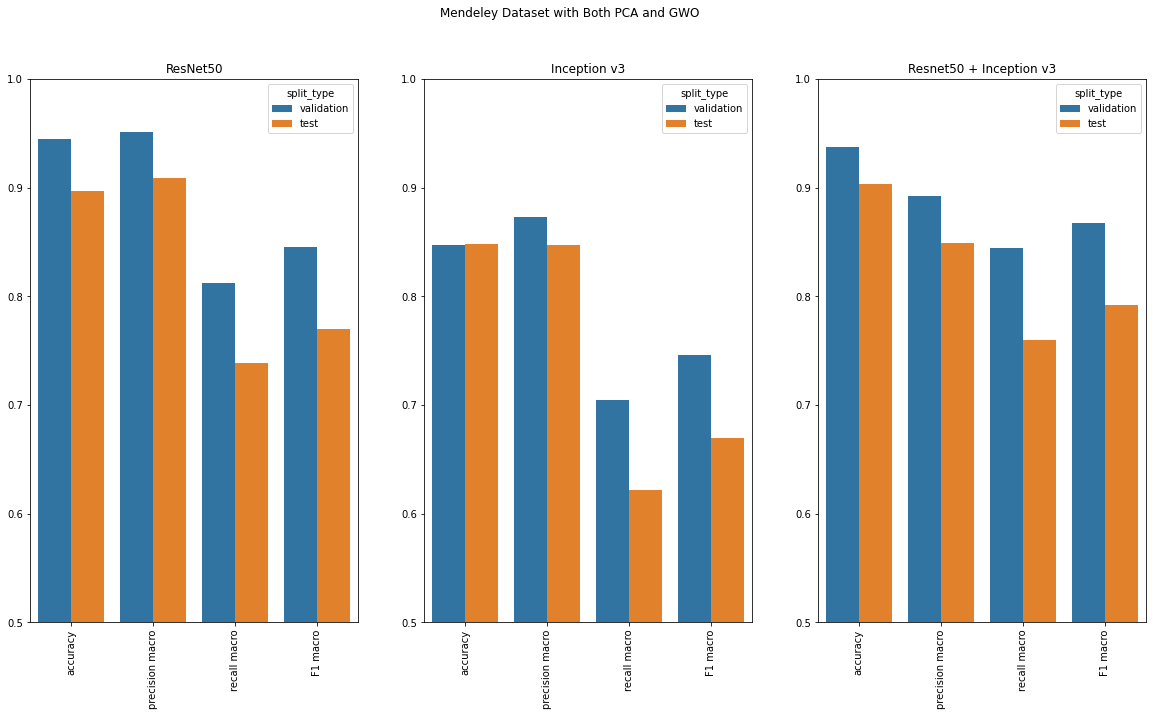

In [9]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Mendeley Dataset with Both PCA and GWO')
plt.subplot(1,3,1)
sns.barplot(x='met_type',
            y='value', hue='split_type', data=df_resnet)
ax = plt.gca()
ax.set_ylim([0.5, 1.0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('ResNet50')
plt.xticks(rotation=90);

plt.subplot(1,3,2)
sns.barplot(x='met_type',
            y='value', hue='split_type', data=df_incep)
ax = plt.gca()
ax.set_ylim([0.5, 1.0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Inception v3')
plt.xticks(rotation=90);

plt.subplot(1,3,3)
sns.barplot(x='met_type',
            y='value', hue='split_type', data=df_both)
ax = plt.gca()
ax.set_ylim([0.5, 1.0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Resnet50 + Inception v3')
plt.xticks(rotation=90);